In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# تولید داده‌ی غیرخطی (مثال کلاسیک مثل XOR یا موونز)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [3]:
# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# تعریف مدل MLP
mlp = MLPClassifier(max_iter=1000, random_state=1)

In [5]:
param_grid = {
    'hidden_layer_sizes': [(5, 5), (10, 10), (50, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.01],  # regularization
}

In [6]:
# اجرای grid search با cross-validation
grid = GridSearchCV(mlp, param_grid, cv=5)
grid.fit(X, y)

c:\Users\Notebook\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Notebook\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Notebook\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Notebook\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Notebook\anaconda3\Lib\site-packages\sklearn\ne

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=1),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(5, 5), (10, 10), (50, 50),
                                                (50, 50, 50)]})

In [10]:
# بهترین ترکیب پارامترها
print("best params : ", grid.best_params_)
print(f"best score : {grid.best_score_:.2f}")

best params :  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}
best score : 0.95


In [8]:
# ارزیابی مدل
accuracy = grid.score(X_test, y_test)
print(f"accuracy : {accuracy:.2f}")

accuracy : 0.95


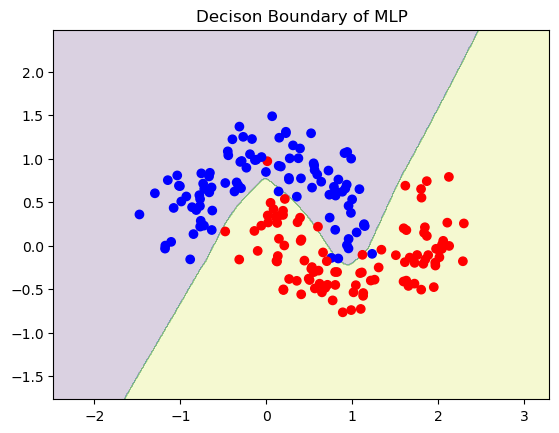

In [9]:
# رسم داده‌ها و ناحیه‌ی تصمیم
import numpy as np

def plot_decision_boundary(model, X, y):
    h = 0.01
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title("Decison Boundary of MLP")
    plt.show()

plot_decision_boundary(grid.best_estimator_, X, y)